<a href="https://colab.research.google.com/github/BluEagle/Alfaport/blob/master/fineTuning(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
import scipy.ndimage

Using TensorFlow backend.


In [0]:
!wget https://www.dropbox.com/s/h5yora9j0onglw6/train.zip?dl=0

--2019-03-19 13:09:58--  https://www.dropbox.com/s/h5yora9j0onglw6/train.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/h5yora9j0onglw6/train.zip [following]
--2019-03-19 13:10:04--  https://www.dropbox.com/s/raw/h5yora9j0onglw6/train.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 429 Too Many Requests
2019-03-19 13:10:04 ERROR 429: Too Many Requests.



In [0]:
!unzip train.zip?dl=0

unzip:  cannot find or open train.zip?dl=0, train.zip?dl=0.zip or train.zip?dl=0.ZIP.

No zipfiles found.


In [0]:
!wget https://www.dropbox.com/s/c94io61nmldcgv8/test.zip?dl=0

--2019-03-19 13:10:12--  https://www.dropbox.com/s/c94io61nmldcgv8/test.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/c94io61nmldcgv8/test.zip [following]
--2019-03-19 13:10:12--  https://www.dropbox.com/s/raw/c94io61nmldcgv8/test.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 429 Too Many Requests
2019-03-19 13:10:13 ERROR 429: Too Many Requests.



In [0]:
!unzip test.zip?dl=0

unzip:  cannot find or open test.zip?dl=0, test.zip?dl=0.zip or test.zip?dl=0.ZIP.

No zipfiles found.


In [0]:
train_path = "train/"

test_path = "test/"

In [0]:
from keras.applications import VGG16
#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))


Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 5s 0us/step


In [0]:
# Freeze the layers except the last 4 layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f20c3f5d550> False
<keras.layers.convolutional.Conv2D object at 0x7f20808aceb8> False
<keras.layers.convolutional.Conv2D object at 0x7f208021a128> False
<keras.layers.pooling.MaxPooling2D object at 0x7f208023b898> False
<keras.layers.convolutional.Conv2D object at 0x7f208023b2e8> False
<keras.layers.convolutional.Conv2D object at 0x7f20801f1208> False
<keras.layers.pooling.MaxPooling2D object at 0x7f2080208cf8> False
<keras.layers.convolutional.Conv2D object at 0x7f20802089b0> False
<keras.layers.convolutional.Conv2D object at 0x7f20801b3828> False
<keras.layers.convolutional.Conv2D object at 0x7f2080152898> False
<keras.layers.pooling.MaxPooling2D object at 0x7f208017b828> False
<keras.layers.convolutional.Conv2D object at 0x7f208017b390> False
<keras.layers.convolutional.Conv2D object at 0x7f208012a3c8> False
<keras.layers.convolutional.Conv2D object at 0x7f2080143358> False
<keras.layers.pooling.MaxPooling2D object at 0x7f20800ef278>

In [0]:
from keras import models
from keras import layers
from keras import optimizers
 
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(23, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              8389632   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
___________________________

In [0]:
# (1) Importing dependency
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import numpy as np
np.random.seed(1000)

In [0]:
# Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(23))
model.add(Activation('softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_1 (Activation)    (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_2 (Activat

In [0]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      featurewise_center=True,
      featurewise_std_normalization=True,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(
                      rescale=1./255,
                      featurewise_center=True,
                      featurewise_std_normalization=True,
                      rotation_range=20,
                      width_shift_range=0.2,
                      height_shift_range=0.2,
                      horizontal_flip=True,
                      fill_mode='nearest')
 
# Change the batchsize according to your system RAM
train_batchsize = 64
val_batchsize = 32
 
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(128, 128),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        test_path,
        target_size=(128, 128),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

FileNotFoundError: ignored

In [0]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
# Train the model
history =model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)
 
# Save the model
model.save('small_last4.hdf5')

Instructions for updating:
Use tf.cast instead.
Epoch 1/100


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:707: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


244/243 [==============================] - 337s 1s/step - loss: 3.7636 - acc: 0.0771 - val_loss: 4.5638 - val_acc: 0.0872
Epoch 2/100
244/243 [==============================] - 319s 1s/step - loss: 3.4829 - acc: 0.1003 - val_loss: 7.8925 - val_acc: 0.0815
Epoch 3/100
244/243 [==============================] - 321s 1s/step - loss: 3.3152 - acc: 0.1154 - val_loss: 3.2874 - val_acc: 0.1422
Epoch 4/100
244/243 [==============================] - 325s 1s/step - loss: 3.1772 - acc: 0.1315 - val_loss: 3.0549 - val_acc: 0.1162
Epoch 5/100
244/243 [==============================] - 318s 1s/step - loss: 3.0887 - acc: 0.1460 - val_loss: 3.9121 - val_acc: 0.0977
Epoch 6/100
244/243 [==============================] - 319s 1s/step - loss: 3.0237 - acc: 0.1576 - val_loss: 3.0320 - val_acc: 0.1429
Epoch 7/100
244/243 [==============================] - 325s 1s/step - loss: 2.9487 - acc: 0.1670 - val_loss: 3.3200 - val_acc: 0.0857
Epoch 8/100
244/243 [==============================] - 320s 1s/step - loss

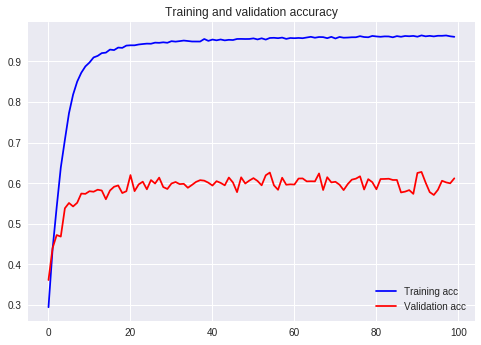

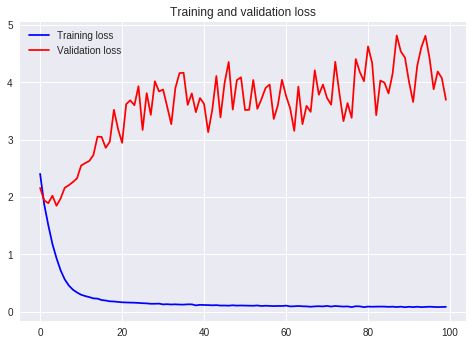

In [0]:
import matplotlib.pyplot as plt 
import numpy as np

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [0]:
from keras.preprocessing import image
# Create a generator for prediction
validation_generator = validation_datagen.flow_from_directory(
        test_path,
        target_size=(75, 75),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)
 
# Get the filenames from the generator
fnames = validation_generator.filenames
 
# Get the ground truth from generator
ground_truth = validation_generator.classes
 
# Get the label to class mapping from the generator
label2index = validation_generator.class_indices
 
# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())
 
# Get the predictions from the model using the generator
predictions = model.predict_generator(validation_generator, steps=validation_generator.samples/validation_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)
 
errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),validation_generator.samples))
 
# Show the errors
for i in range(len(errors)):
    pred_class = np.argmax(predictions[errors[i]])
    pred_label = idx2label[pred_class]
     
    title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        fnames[errors[i]].split('/')[0],
        pred_label,
        predictions[errors[i]][pred_class])
     
    original = image.load_img('{}/{}'.format(test_path,fnames[errors[i]]))
    plt.figure(figsize=[7,7])
    plt.axis('off')
    plt.title(title)
    plt.imshow(original)
    plt.show()